In [1]:
import torch 
torch.manual_seed(1)
import sys
sys.path.append('..')

%load_ext autoreload
%autoreload 2

import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['mathtext.rm'] = 'serif'

In [2]:
from models_nf import MixedModelDensityEstimator,DIFDensityEstimatorLayer,RealNVPDensityEstimatorLayer,DIFSamplerLayer, RealNVPSamplerLayer, MixedModelSampler
from utils.visual import visual_flow

In [3]:
from targets.variational_inference_target import *
num_samples = 50000
target =Dimension1()
target_log_density = target.log_prob
p = target.p

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:18<00:00,  3.97s/it, loss = 1.420995]


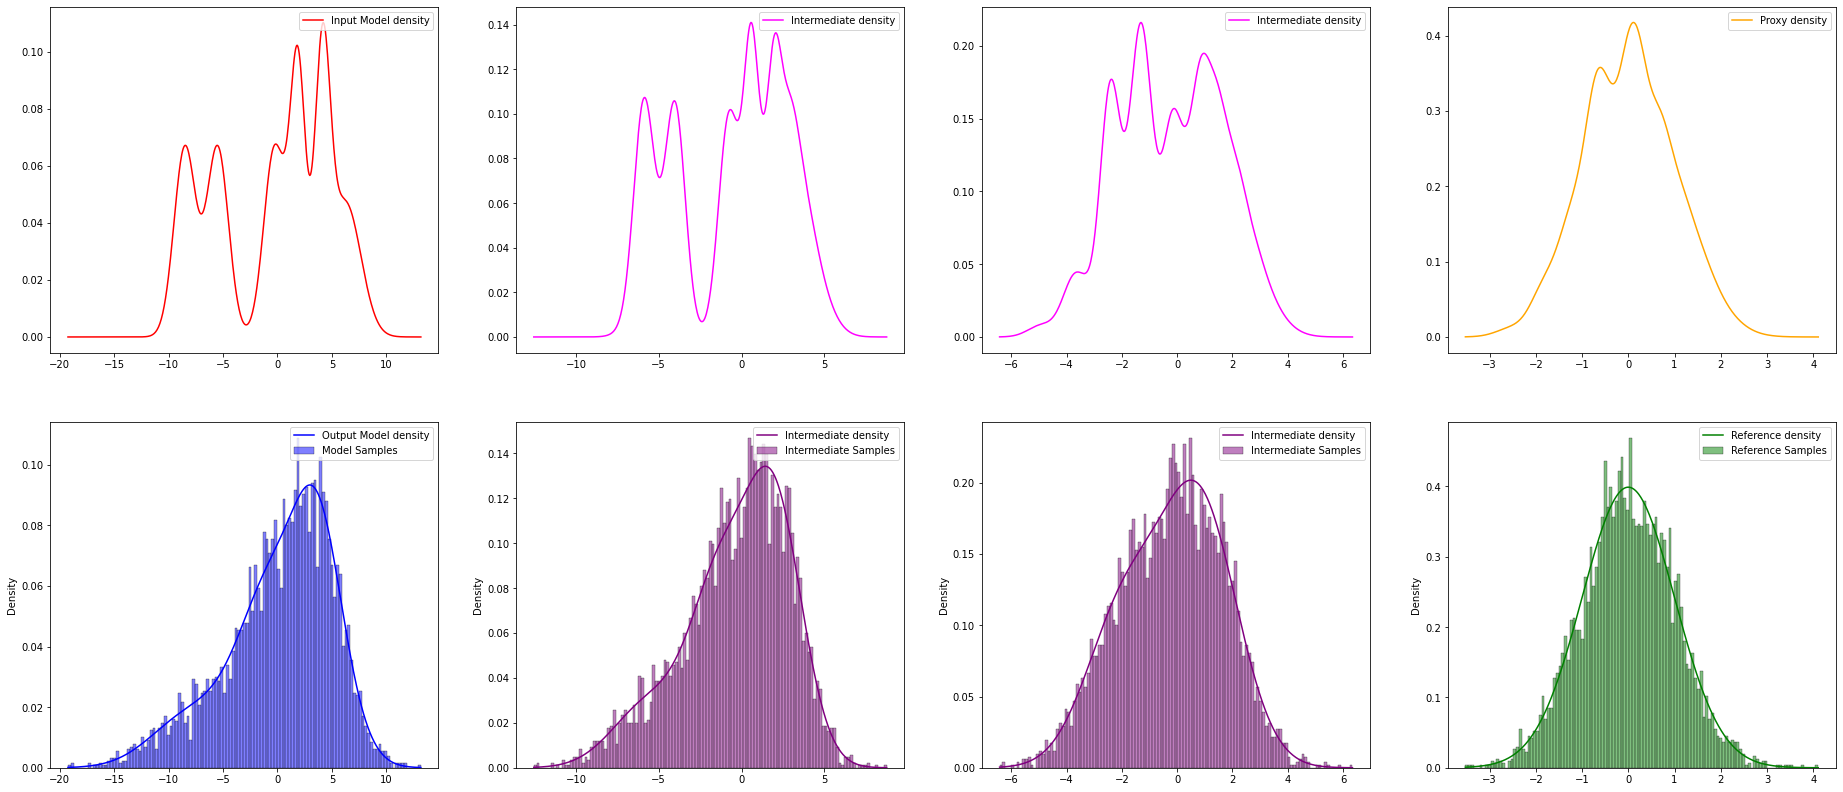

In [5]:
num_samples = 50000
batch_size = 5000
epochs =50
structure = [[DIFSamplerLayer,2],[DIFSamplerLayer,2],[DIFSamplerLayer,2]]
flow = MixedModelSampler(target_log_density,p,structure)
flow.train(num_samples, epochs, batch_size)
visual_flow(flow)

In [6]:
from targets.density_estimation_target import * 
target = Dimension1()
num_samples = 50000
target_samples = target.sample(num_samples)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [01:35<00:00,  1.91s/it, loss = 2.880607]


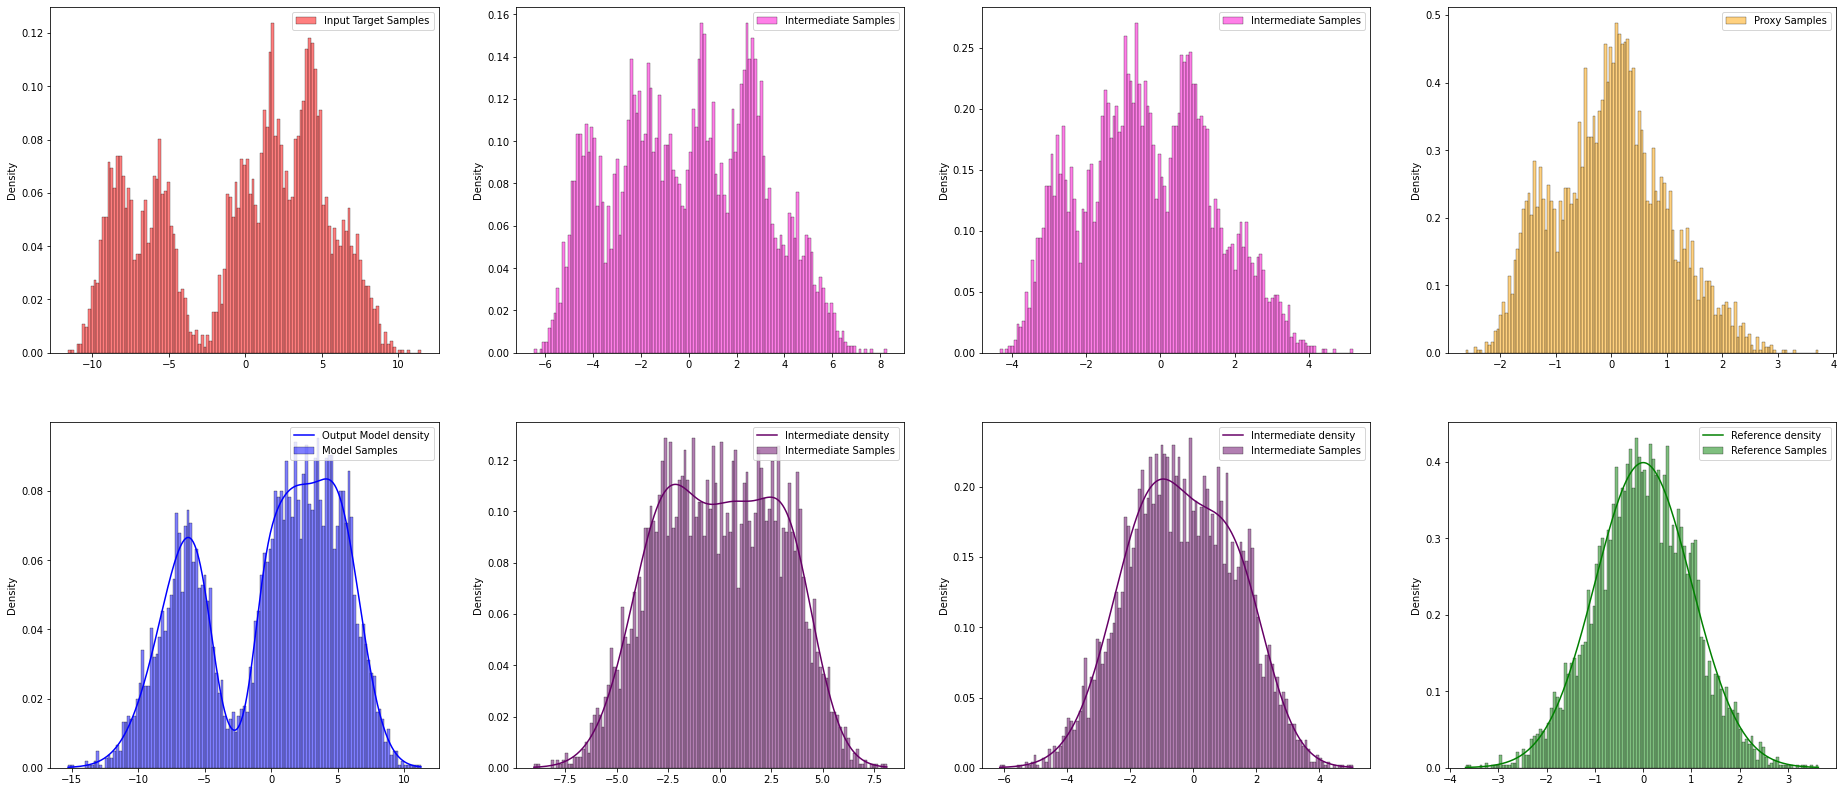

In [7]:
num_samples = 50000
batch_size = 5000
epochs = 50
structure = [[DIFDensityEstimatorLayer,2],[DIFDensityEstimatorLayer,2],[DIFDensityEstimatorLayer,2]]
dif = MixedModelDensityEstimator(target_samples,structure)
dif.train(epochs, batch_size)
visual_flow(dif)